In [25]:
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import cv2
import os
import numpy as np

In [15]:
# Parameters for LBP
radius = 3
n_points = 8 * radius
METHOD = 'uniform'

# Function to extract LBP features from an image
def extract_lbp_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to read image at path: {image_path}") 
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [21]:
# Load Corel dataset and extract features
# Assuming the Corel dataset is structured in folders with each category
training_dataset_path = 'C:/Users/Madhusmita Das/Corel/dataset/training_set'
features = []
labels = []
image_path_for_retrival=[]
for category_folder in os.listdir(training_dataset_path):
    category_folder_path = os.path.join(training_dataset_path, category_folder)
    for image_file in os.listdir(category_folder_path):
        image_path = os.path.join(category_folder_path, image_file)
        labels.append(category_folder)
        features.append(extract_lbp_features(image_path))
        image_path_for_retrival.append(image_path)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)
X_train = features
y_train = labels

In [22]:
test_dataset_path = 'C:/Users/Madhusmita Das/Corel/dataset/test_set'
test_features = []
test_labels = []

for category_folder in os.listdir(test_dataset_path):
    category_folder_path = os.path.join(test_dataset_path, category_folder)
    for image_file in os.listdir(category_folder_path):
        image_path = os.path.join(category_folder_path, image_file)
        test_labels.append(category_folder)
        test_features.append(extract_lbp_features(image_path))

# Convert lists to numpy arrays
test_features = np.array(test_features)
test_labels = np.array(test_labels)
X_test = test_features
y_test = test_labels

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.59


In [35]:
import pickle

# Save the model to a file
with open('corel_lbp.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, you can load the model from the file
# with open('random_forest_model.pkl', 'rb') as file:
#     model = pickle.load(file)

In [26]:
# Compute precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1score = f1_score(y_test, y_pred, average=None)

# Print class-wise metrics
for class_label in range(1, len(precision) + 1):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label - 1]:.4f}")
    print(f"Recall: {recall[class_label - 1]:.4f}")
    print(f"F1 Score: {f1score[class_label - 1]:.4f}\n")

# Print overall classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Class 1:
Precision: 0.2727
Recall: 0.3000
F1 Score: 0.2857

Class 2:
Precision: 0.7000
Recall: 0.7000
F1 Score: 0.7000

Class 3:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Class 4:
Precision: 0.2222
Recall: 0.2000
F1 Score: 0.2105

Class 5:
Precision: 0.7500
Recall: 0.9000
F1 Score: 0.8182

Class 6:
Precision: 0.5556
Recall: 0.5000
F1 Score: 0.5263

Class 7:
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000

Class 8:
Precision: 0.6923
Recall: 0.9000
F1 Score: 0.7826

Class 9:
Precision: 0.3000
Recall: 0.3000
F1 Score: 0.3000

Class 10:
Precision: 0.5000
Recall: 0.3000
F1 Score: 0.3750

Classification Report:
                               precision    recall  f1-score   support

                      beaches       0.27      0.30      0.29        10
                          bus       0.70      0.70      0.70        10
                    dinosaurs       1.00      1.00      1.00        10
                    elephants       0.22      0.20      0.21        10
                    

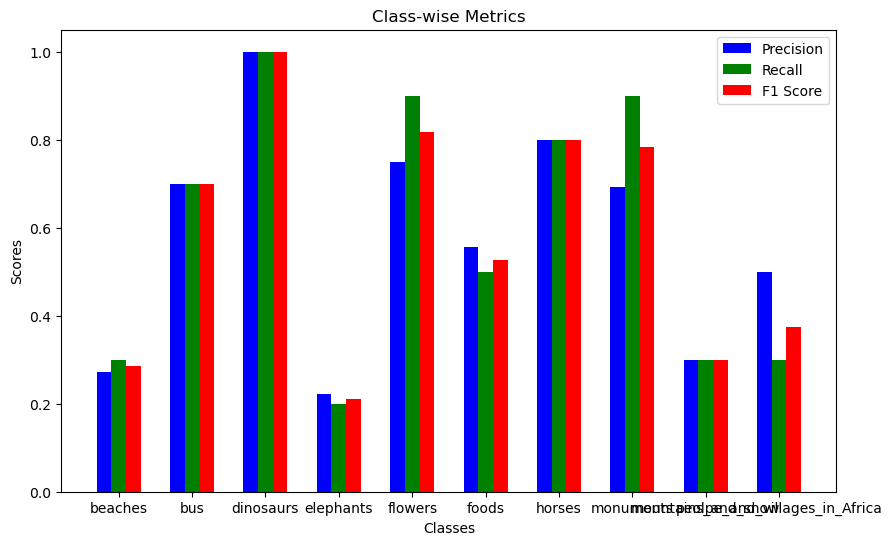

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual metrics)
classes = ['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers','foods','horses','monuments','mountains_and_snow','peolpe_and_villages_in_Africa']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.2

# Plot bars
ax.bar(np.arange(len(classes)), precision, width, label='Precision', color='b')
ax.bar(np.arange(len(classes)) + width, recall, width, label='Recall', color='g')
ax.bar(np.arange(len(classes)) + 2 * width, f1score, width, label='F1 Score', color='r')

# Customize plot
ax.set_xticks(np.arange(len(classes)) + width)
ax.set_xticklabels(classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Class-wise Metrics')
ax.legend()

# Show the plot
plt.show()


In [28]:
def display_images(image_paths):
  cols = 3  # Adjust the number of columns as needed
  rows = int(len(image_paths) / cols) + (len(image_paths) % cols > 0)
  plt.figure(figsize=(15, 4 * rows))
  for i, image_path in enumerate(image_paths):
    plt.subplot(rows, cols, i + 1)
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
  plt.tight_layout()
  plt.show()

Query Image:


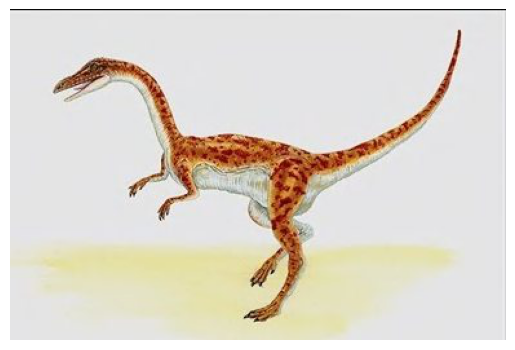

Similar Images:


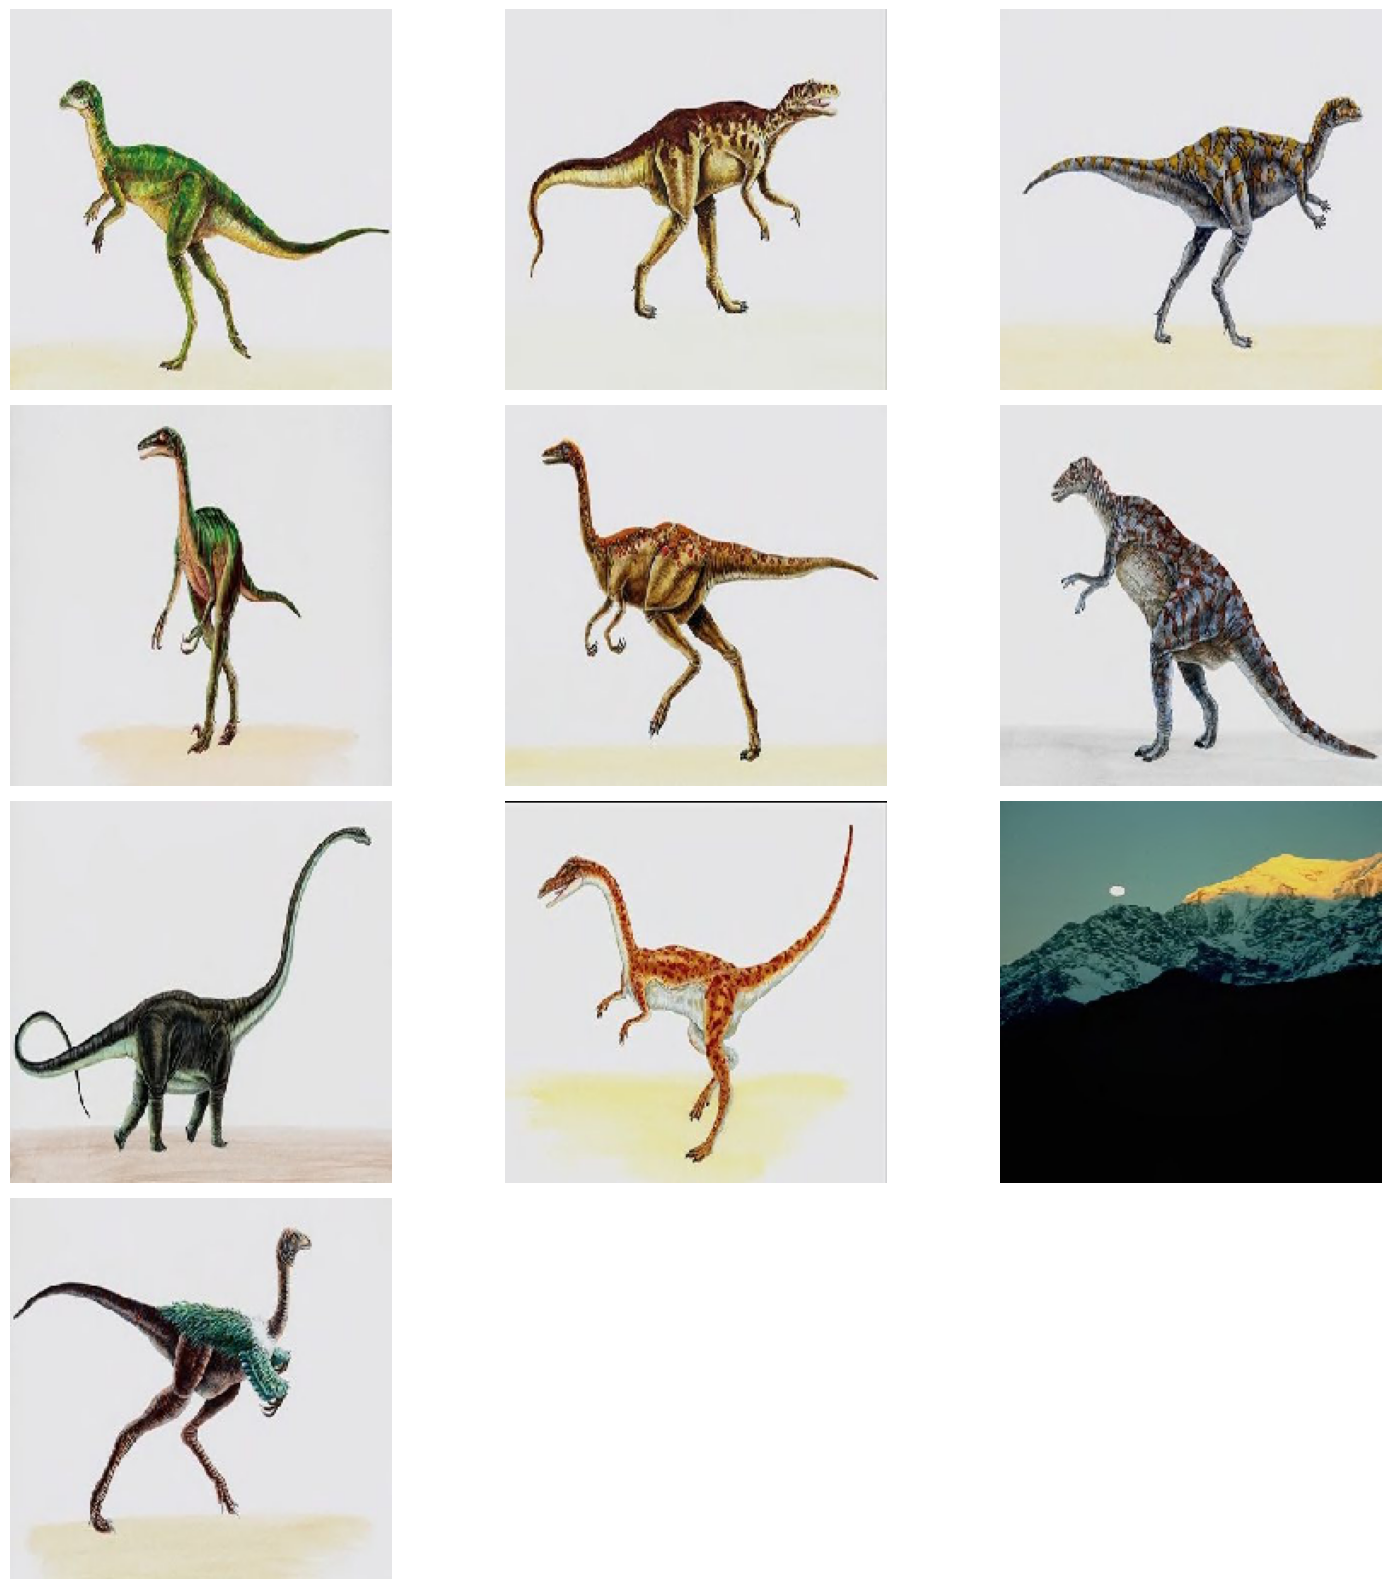

In [32]:
from tensorflow.keras.preprocessing import image
# Content-Based Image Retrieval (CBIR)
# For CBIR, you would typically index your dataset's features and then compare the query image's features to the indexed ones.

# Function to retrieve similar images
def retrieve_similar_images(query_image_path, feature_dataset, image_paths, top_k=10):
    query_features = extract_lbp_features(query_image_path)
    query_features = scaler.transform([query_features])  # Scale features as done for training data
    similarities = np.dot(feature_dataset, query_features.T).flatten()
    indices = np.argsort(similarities)[::-1][:top_k]
    return [image_path_for_retrival[i] for i in indices]

# Example usage of CBIR
query_image = 'C:/Users/Madhusmita Das/Corel/dataset/training_set/dinosaurs/413.jpg'
similar_images = retrieve_similar_images(query_image, features, labels)


# Display the query image and similar images
print("Query Image:")
plt.imshow(plt.imread(query_image))
plt.axis('off')
plt.show()

print("Similar Images:")
display_images(similar_images)
